In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [46]:
# load data
(x_train, x_test),(y_train, y_test) = keras.datasets.fashion_mnist.load_data()

In [47]:
# data normalization
x_train, y_train = x_train / 255.0, y_train / 255.0


In [48]:
# build CNN
model=keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    ])



In [49]:
# compile model
loss = keras.losses.sparse_categorical_crossentropy
metrics = keras.metrics.sparse_categorical_accuracy

model.compile(optimizer='adam', loss=loss, metrics=[metrics])

In [50]:
# define hyperparameters
train_epochs = 5
batch_size = 32

In [51]:
train_history = model.fit(x_train.reshape(-1,28,28,1),x_test,epochs=train_epochs, batch_size=batch_size, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 - 7s - loss: 0.4421 - sparse_categorical_accuracy: 0.8389
Epoch 2/5
60000/60000 - 7s - loss: 0.2960 - sparse_categorical_accuracy: 0.8921
Epoch 3/5
60000/60000 - 7s - loss: 0.2511 - sparse_categorical_accuracy: 0.9076
Epoch 4/5
60000/60000 - 7s - loss: 0.2180 - sparse_categorical_accuracy: 0.9188
Epoch 5/5
60000/60000 - 7s - loss: 0.1929 - sparse_categorical_accuracy: 0.9277


In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [53]:
train_history.history

{'loss': [0.44205438612302145,
  0.2959533159216245,
  0.25107851569453876,
  0.21804007815519968,
  0.19289737743586302],
 'sparse_categorical_accuracy': [0.83891666,
  0.89208335,
  0.9076,
  0.9187833,
  0.9277167]}

In [54]:
def show_train_history(train_histroy, metric):
    plt.plot(train_history.history[metric])

    plt.title("train history")

    plt.xlabel('epoch')
    plt.ylabel(metric)

    plt.show

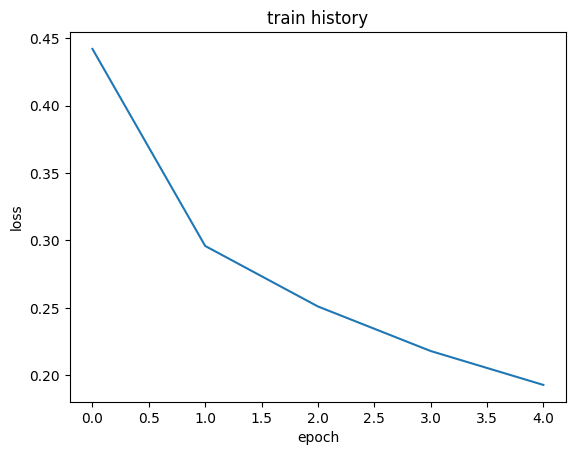

In [55]:
show_train_history(train_history, 'loss')

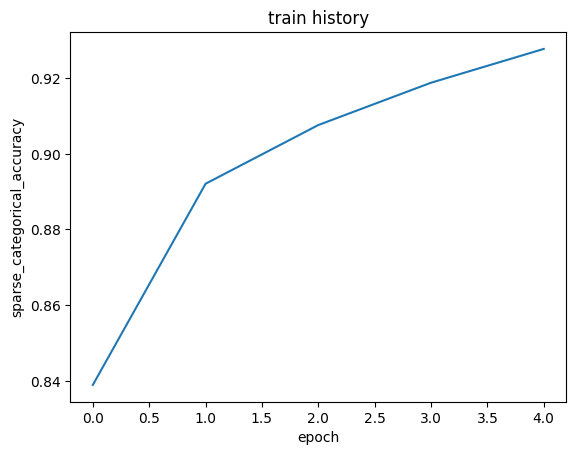

In [56]:
show_train_history(train_history, 'sparse_categorical_accuracy')

In [57]:
# evaluate model
test_loss, test_acc = model.evaluate(y_train.reshape(-1, 28, 28, 1), y_test, verbose=2)

10000/10000 - 1s - loss: 0.2888 - sparse_categorical_accuracy: 0.9019


In [58]:
print(test_loss)
print(test_acc)

0.2887880345702171
0.9019
